In [50]:
import sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pickle
from IPython.display import  Audio
import os
from config import SAMPLE_RATE
import scipy.signal
from audio import audio
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [51]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
dataset = pickle.load(open('data/data_wavs_compiled.pkl', 'rb'))


In [53]:
Audio(dataset[1], rate=SAMPLE_RATE)

/Users/nemo/Documents/projects/Signal_processing/VoiceVAE/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


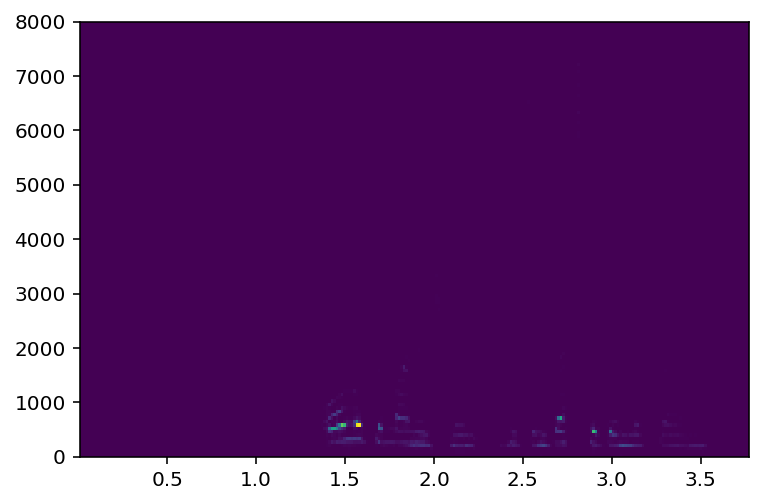

In [54]:
wav = dataset[1]
f, t, Sxx = scipy.signal.spectrogram(wav, fs=SAMPLE_RATE)

plt.pcolormesh(t, f, Sxx)

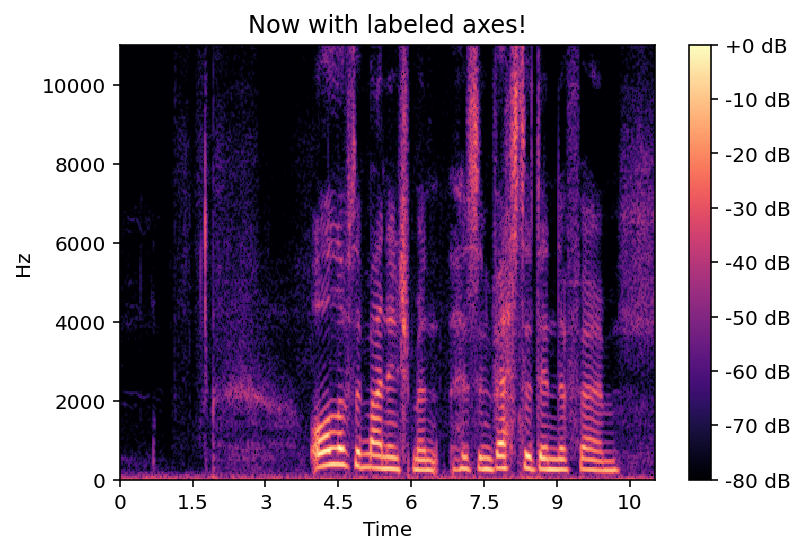

In [55]:
audio.plot_spectrogram(wav, SAMPLE_RATE)


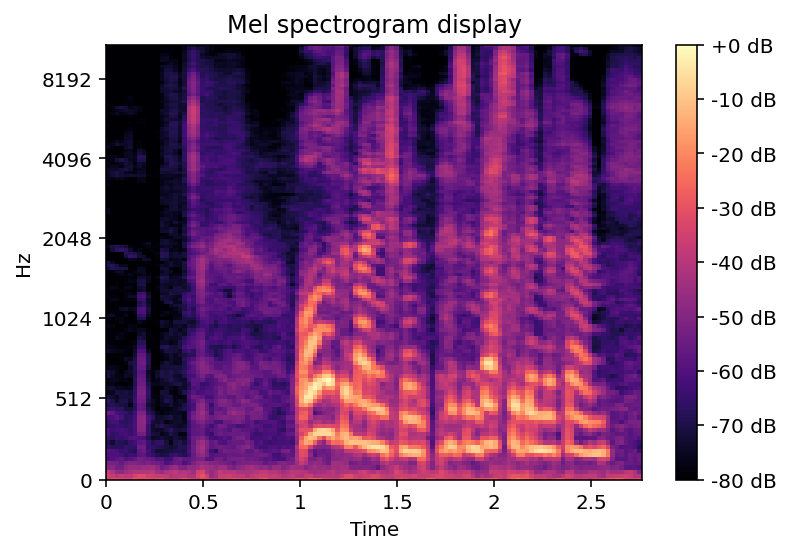

In [56]:
audio.plot_spectrogram_mel(wav, SAMPLE_RATE)
